## Medical Cost Personal Datasets
## Insurance Forecast by using Linear Regression

## Content
Columns - age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [1]:
# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
# read dataset:
data = pd.read_csv("C:/Users/Admin/Downloads/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# shape of data how many raws and columns:
data.shape # 1338 = raws and 7 = columns

(1338, 7)

In [4]:
# checking null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

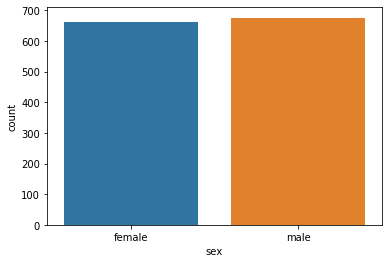

In [5]:
# how many male and female
sns.countplot(data['sex'])

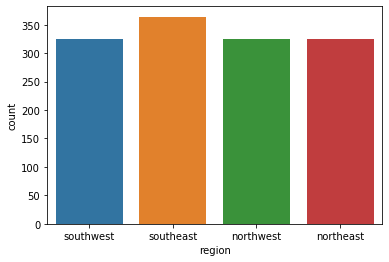

In [6]:
# how many region in dataset
sns.countplot(data['region'])

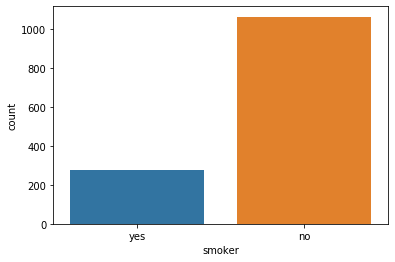

In [7]:
# divide smoker or not
sns.countplot(data['smoker'])

In [8]:
# Label encoding:
# categories data convert into numerical using Label encoding and removing duplicates.
from sklearn.preprocessing import LabelEncoder
#sex
lable_encoder = LabelEncoder()
lable_encoder.fit(data.sex.drop_duplicates()) 
data.sex = lable_encoder.transform(data.sex)
# smoker or not
lable_encoder.fit(data.smoker.drop_duplicates()) 
data.smoker = lable_encoder.transform(data.smoker)
#region
lable_encoder.fit(data.region.drop_duplicates()) 
data.region = lable_encoder.transform(data.region)

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Let's pay attention to children. First, let's see how many children our patients have.


C:\Users\Admin\.conda\envs\nishant\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


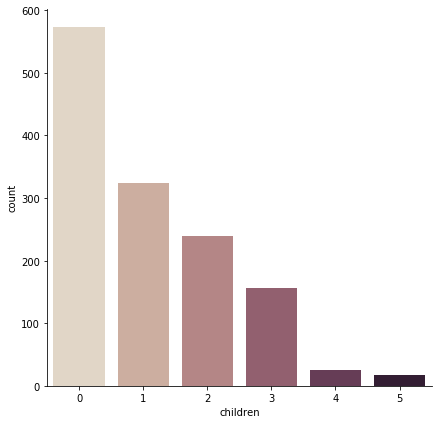

In [10]:
# how many children 
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Most patients do not have children. Perfectly that some have 5 children! Children are happiness:)

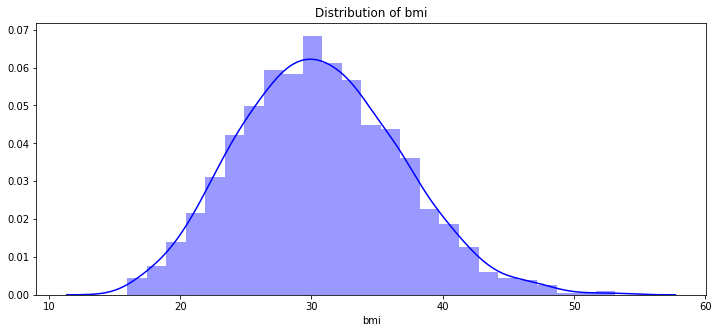

In [11]:
# Distribution of bmi(Body mass index)
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'b')

The average BMI in patients is 30

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

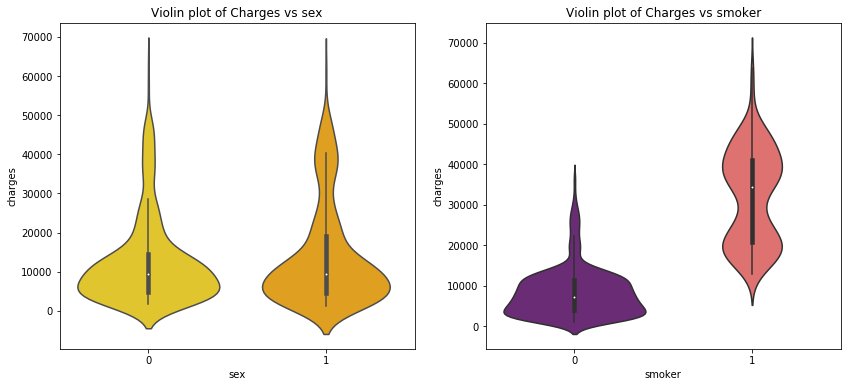

In [12]:
# Violin plot: Charges vs sex and Charges vs smoker: 
# we can see that outliers 
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=data,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=data,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

Text(0.5, 1.0, 'box plot of charges vs children')

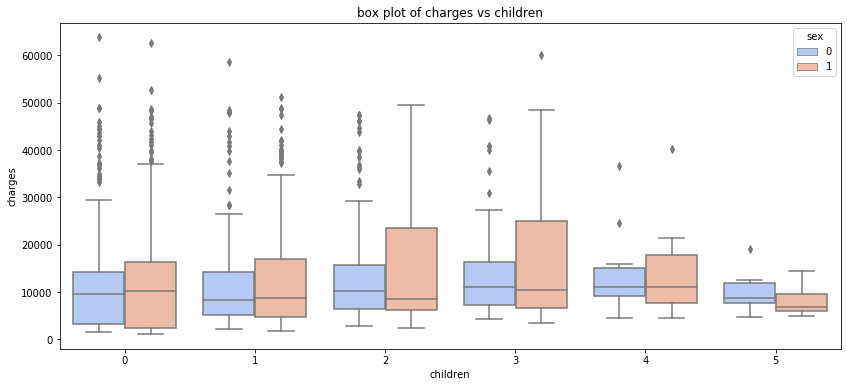

In [13]:
# box plot of charges vs children:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=data,palette='coolwarm')
plt.title('box plot of charges vs children')

In [14]:
# import sklearn librabies :
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [15]:
# correlation 
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [16]:
x = data.drop(['charges'], axis = 1) # train data  
y = data.charges #  target data
# spliting data :
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
linear_regression = LinearRegression().fit(x_train,y_train)
#predict test and train data:
y_train_pred = linear_regression.predict(x_train)
y_test_pred = linear_regression.predict(x_test)
# score:
print(linear_regression.score(x_test,y_test))

0.7962732059725786


In [17]:
print("Model slope: ",linear_regression.coef_[0])
print("Model intercept:", linear_regression.intercept_)

Model slope:  250.53755621469605
Model intercept: -11261.138825163942


In [18]:
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred)) # *RMSE ( root mean square error)
r2 = r2_score(y_test,y_test_pred) # r^2: R-squared is the proportion of variance explained
print('rmse:',rmse)
print('r2:',r2) 

rmse: 5663.358417062195
r2: 0.7962732059725786


In [19]:
data.describe(include ='all') 

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [20]:
# polynomial regression:
X = data.drop(['charges'], axis = 1)# train data  # charges and region column drop beacuse of it is not correlated that much.
Y = data.charges


quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
# spliting data :

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)
#predict test and train data:
Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)
# score:
print(plr.score(X_test,Y_test))


0.8846283666147681


In [21]:
# polynomial regression:
X = data.drop(['charges','region'], axis = 1)# train data  # charges and region column drop beacuse of it is not correlated that much.
Y = data.charges


quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
# spliting data :

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)
#predict test and train data:
Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)
# score:
print(plr.score(X_test,Y_test))


0.8849197344147238


In [22]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1)
forest.fit(x_train,y_train)
#predict test and train data:
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3729086.094, MSE test data: 19933823.142
R2 train data: 0.974, R2 test data: 0.873


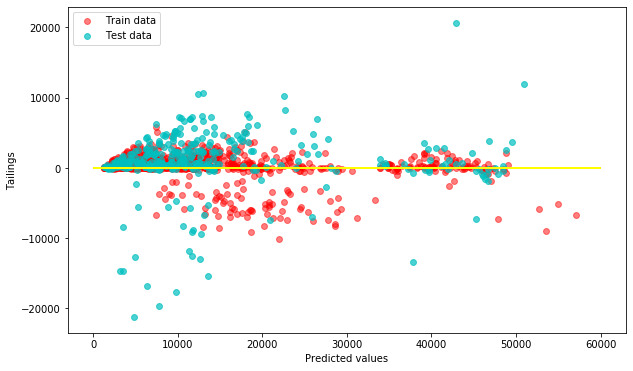

In [23]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'red', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'yellow')
plt.show()

Good result. But we see a noticeable retraining of the algorithm on the training data.

In [24]:
# Linear regression, also called Ordinary Least-Squares (OLS)
# Statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     263.1
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:25:16   Log-Likelihood:                -9957.5
No. Observations:                1003   AIC:                         1.995e+04
Df Residuals:                     984   BIC:                         2.005e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5958.8909   3898.816     -1.528      0.1

In [25]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  const   -5958.890870
x1        -26.677439
x2       -342.040990
x3        563.684841
x4        836.533884
x5      -9504.814350
x6          2.932611
x7         11.724642
x8          1.514775
x9          5.339092
x10         7.395620
x11      -342.040990
x12         9.161599
x13      -283.372404
x14      -629.847064
x15        -9.935342
x16         8.441911
x17      1415.493850
x18      -130.171297
x19      -448.324744
x20     -9504.814350
dtype: float64
Standard errors:  const    3898.815570
x1         94.569947
x2        891.489624
x3        200.892676
x4        847.613524
x5       1128.266437
x6          0.988984
x7         22.847761
x8          1.830718
x9         10.169013
x10        28.886727
x11       891.489624
x12        51.727521
x13       265.203782
x14       806.327100
x15         3.029593
x16        21.733970
x17        63.032343
x18        97.042685
x19       347.618004
x20      1128.266437
dtype: float64
Predicted values:  [ 6732.11071151 12959.96253409  3651.2